### モジュールのインポート

In [1]:
from yikit.feature_selection import FilterSelector
from sklearn.datasets import load_diabetes
import seaborn as sns
import pandas as pd

### サンプルデータの取得

In [2]:
diabetes = load_diabetes()
X = pd.DataFrame(diabetes['data'], columns = diabetes['feature_names'])
y = pd.Series(diabetes['target'])
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


### 特徴量同士の相関をみてみる

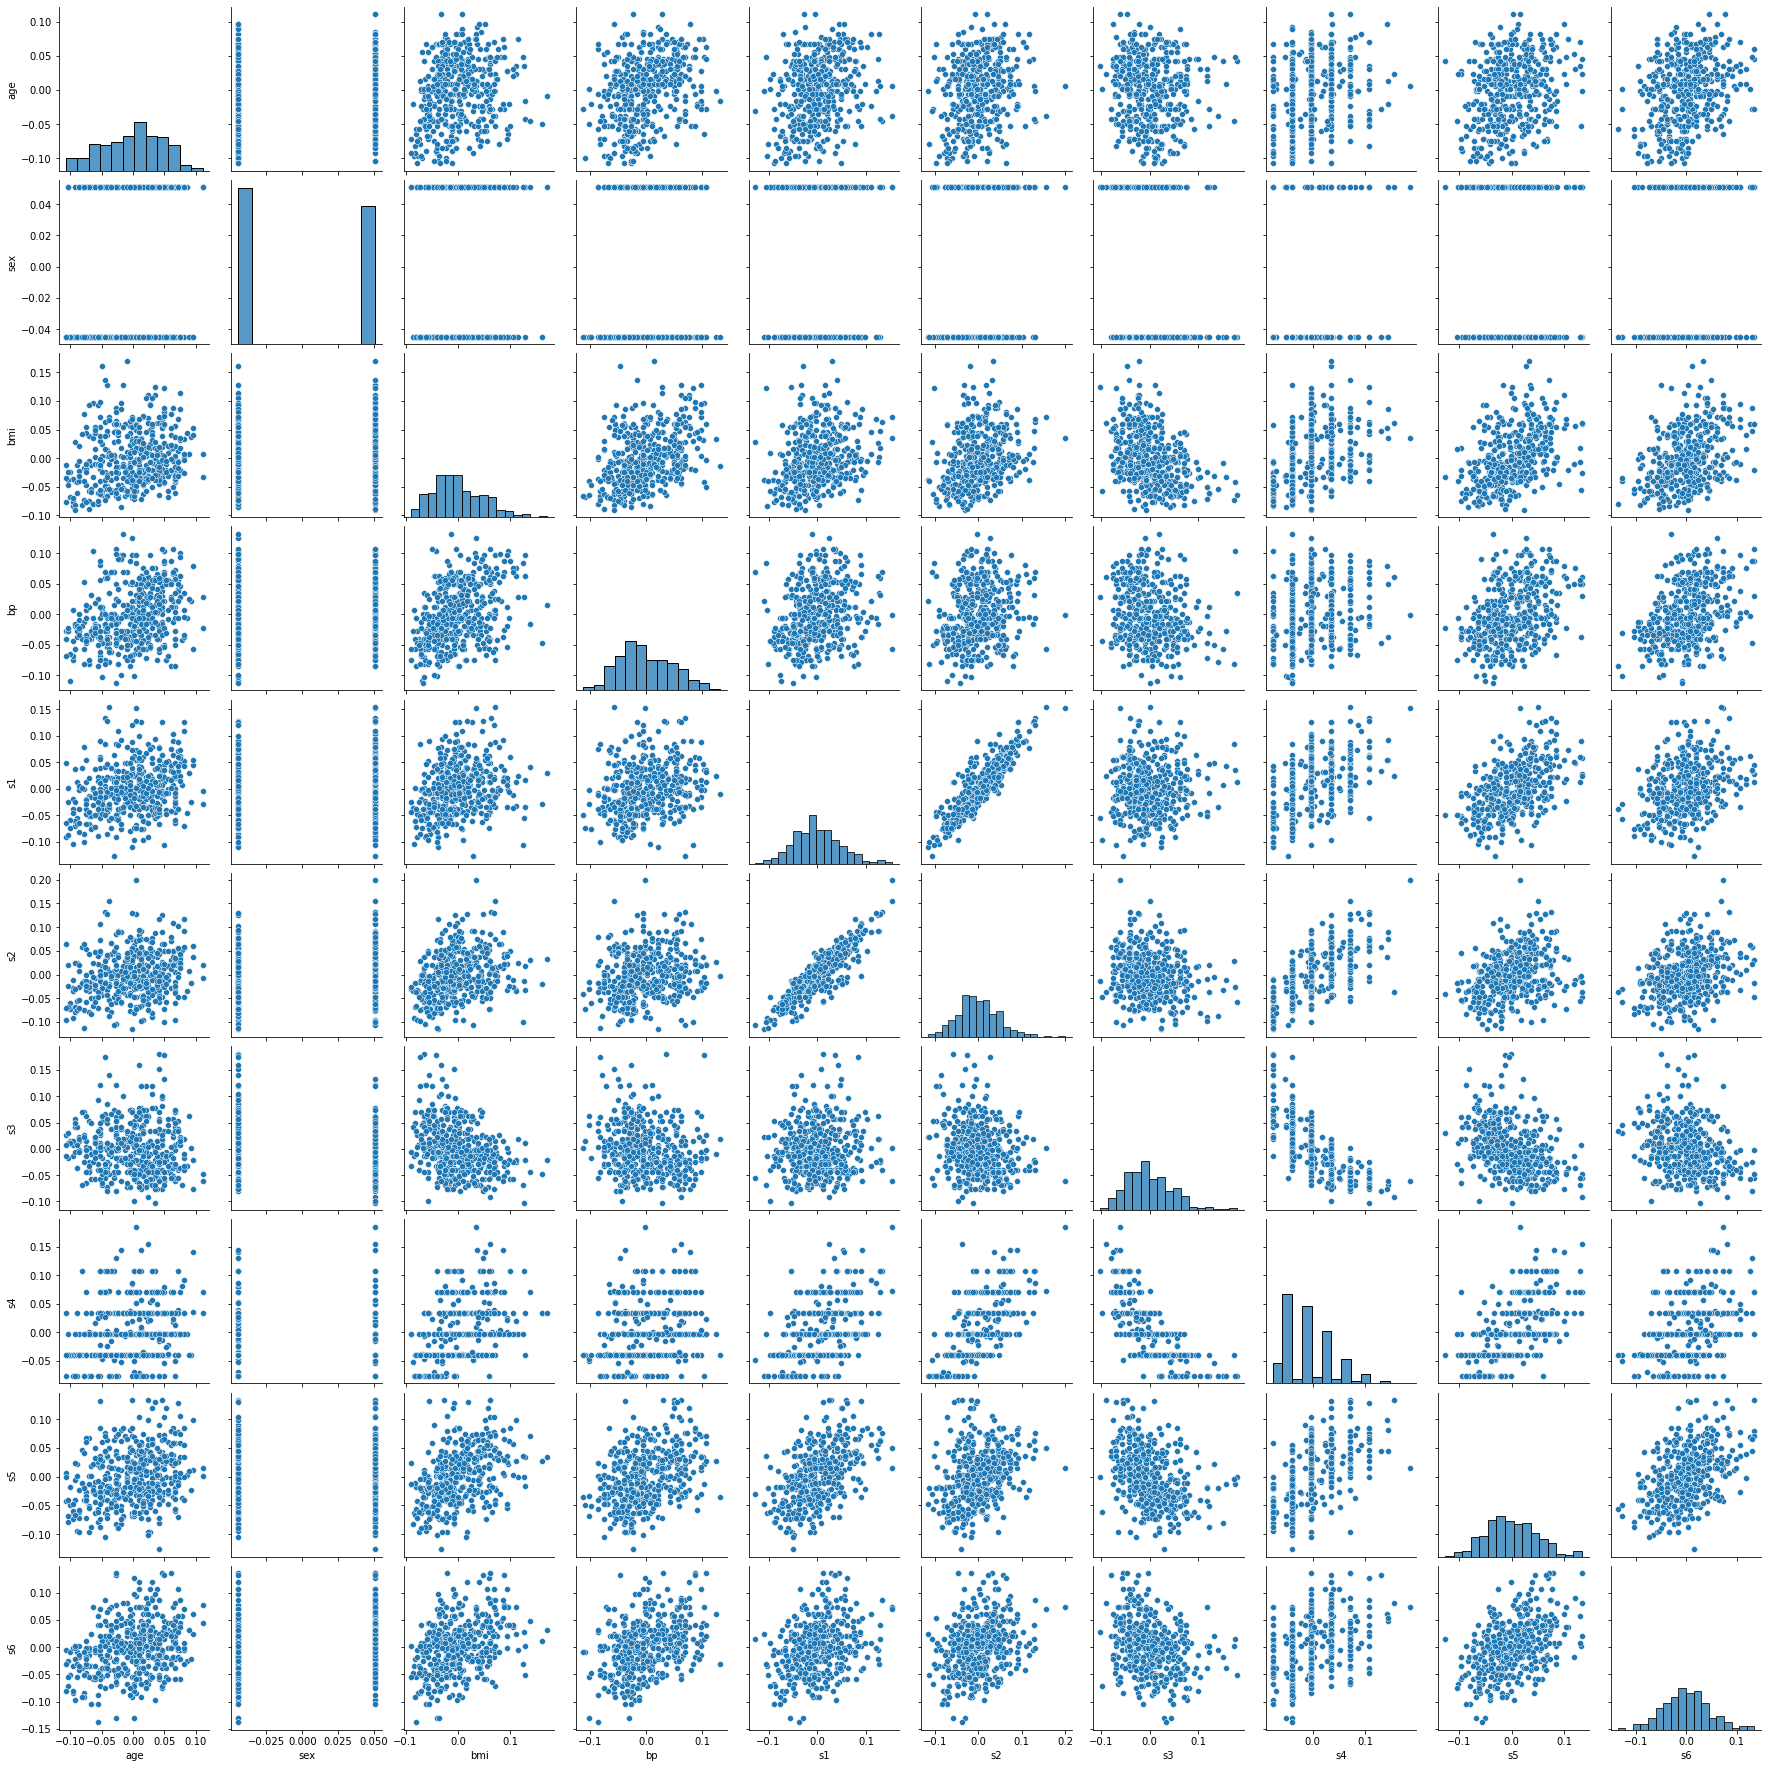

In [3]:
sns.pairplot(X)

### 削減してみる

In [4]:
selector = FilterSelector(r = 0.90)
selector.fit(X)
X_selected = X.loc[:, selector.get_support()]
X_selected.head()

correlation:   0%|          | 0/10 [00:00<?, ?it/s]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


### 削減されたペアを表示

In [5]:
for i in range(selector.corr_.shape[0]):
    for j in range(i, selector.corr_.shape[1]):
        if 1 > selector.corr_[i][j][0] > 0.9:
            print(selector.corr_[i][j], X.columns[i], X.columns[j])

### 相関係数

In [6]:
pd.DataFrame(selector.corr_[:, :, 0], columns = X.columns, index = X.columns)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


### p値

In [7]:
pd.DataFrame(selector.corr_[:, :, 1], columns = X.columns, index = X.columns)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,0.000000e+00,2.423425e-04,9.076792e-05,4.392569e-13,2.894154e-08,3.271391e-06,1.144857e-01,1.568788e-05,7.251191e-09,9.347961e-11
sex,2.423425e-04,0.000000e+00,6.404796e-02,2.922214e-07,4.594318e-01,2.649987e-03,1.486840e-16,7.667030e-13,1.573571e-03,1.025312e-05
bmi,9.076792e-05,6.404796e-02,0.000000e+00,5.413797e-18,1.032152e-07,2.514909e-08,1.594491e-15,1.031196e-19,5.237528e-23,2.170657e-17
bp,4.392569e-13,2.922214e-07,5.413797e-18,0.000000e+00,2.465826e-07,8.708610e-05,1.580418e-04,3.918683e-08,8.089411e-18,1.517459e-17
s1,2.894154e-08,4.594318e-01,1.032152e-07,2.465826e-07,0.000000e+00,8.341807e-158,2.797935e-01,3.819722e-35,2.247028e-31,2.206445e-12
s2,3.271391e-06,2.649987e-03,2.514909e-08,8.708610e-05,8.341807e-158,0.000000e+00,3.194540e-05,1.410336e-56,7.220422e-12,4.751211e-10
s3,1.144857e-01,1.486840e-16,1.594491e-15,1.580418e-04,2.797935e-01,3.194540e-05,0.000000e+00,2.484665e-77,2.786014e-18,4.917718e-09
s4,1.568788e-05,7.667030e-13,1.031196e-19,3.918683e-08,3.819722e-35,1.410336e-56,2.484665e-77,0.000000e+00,6.976741e-48,4.820011e-20
s5,7.251191e-09,1.573571e-03,5.237528e-23,8.089411e-18,2.247028e-31,7.220422e-12,2.786014e-18,6.976741e-48,0.000000e+00,4.666132e-25
s6,9.347961e-11,1.025312e-05,2.170657e-17,1.517459e-17,2.206445e-12,4.751211e-10,4.917718e-09,4.820011e-20,4.666132e-25,0.000000e+00
